<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портреты-пользователей-каждого-региона" data-toc-modified-id="Портреты-пользователей-каждого-региона-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Портреты пользователей каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Xbox-One-&amp;-PC" data-toc-modified-id="Xbox-One-&amp;-PC-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Xbox One &amp; PC</a></span></li><li><span><a href="#Action-&amp;-Sports" data-toc-modified-id="Action-&amp;-Sports-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Action &amp; Sports</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Мир компьютерных игр

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy import stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df.head(5))
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На первый взгляд в данных присуствуют следующие недоработки: 
- пропуски в столбцах Namе, Year_of_Release, Genre, Critic_Score, User_Score и Rating;
- в столбцах Year_of_Release и User_Score не верный тип данных;
- названия столбцов не соответствуют общепринятому стилю.

## Предобработка данных

**Приведем все названия столбцов к нижнему регистру.**

In [3]:
df.columns = df.columns.str.lower()

**Постомтрим на уникальные значения в столбцах, чтобы ознакомиться с данными лучше и проверить на наличие дубликатов.**

In [4]:
display(df['platform'].unique())
display(df['year_of_release'].unique())
display(df['genre'].unique())
display(df['critic_score'].unique())
display(df['user_score'].unique())
display(df['rating'].unique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Проверим на наличие явных и неявных дубликатов.**

In [5]:
df.duplicated().sum()

0

In [6]:
df.duplicated(subset=['name','platform','year_of_release']).sum()

2

In [7]:
df = df[~df.duplicated(subset=['name','platform','year_of_release'])]
df.duplicated(subset=['name','platform','year_of_release']).sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Теперь посмотрим в каких столбцах присутствуют пропуски и сколько их.**

In [9]:
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

**Обработаем пропуски.**

Удалим строки с пропусками в столбцах name, year_of_release и genre, так как они составляют меньшe 2% и их потеря не повредит исследованию.

In [10]:
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Пропуски в столбцах critic_score и user_score мы заполним значением -1, так как все игры разные и применить, например, среднее или медиану нельзя, а пропуски в данных столбцах помешают дальнейшим исследованиям.

In [11]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

Теперь изучим значения в столбце rating.

In [12]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Это обозначения рейтингов, поясним что обозначает каждое из них:
- E - для всех
- M - «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
- T - «Подросткам»: Игра подходит для лиц от 13 лет.
- E10+ - «Для всех от 10 лет и старше»
- K-A - для всех
- AO - «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
- EC - «Для детей младшего возраста»: Игра подходит для детей от 3 лет
- RP - «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Видим, что рейтинги "Е" и "К-А" обозначают одно и тоже, просто раньше использовали "К-А". Поэтому заменим все "К-А" на "Е".

Также все "nan" заменим на на "NR" (no rating), так как вероятнее всего эти игры не оценивала ESRB.

In [13]:
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'] = df['rating'].fillna('NR')
df['rating'].unique()

array(['E', 'NR', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Причиной пропусков может быть человеческий фактор (забыли заполнить, например), также причинами пропусков могут служить технические проблемы или повреждение файла с исходными данными.

**Изменим тип данных** в столбцах year_of_release, user_score и critic_score так как столбец year_of_release отображает год выпуска (это целое число - int64), user_score отображает чистовые значения с плавающей точкой (float64), а critic_score имеет только целые уникальные значения (int64).

Для начала решим вопрос со значением "tbd" из столбца user_score. Это аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Так как эту информацию мы получить не сможем, то заменим все "tbd" на NaN, а потом на -1, потому что информация фактически отсутствует.

In [14]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].fillna(-1)

In [15]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df['user_score'] = df['user_score'].astype('float64', errors='ignore')
df['critic_score'] = df['critic_score'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [16]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [17]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NR,31.38


**Вывод**

Подведем итоги:
- в столбцах, где это необходимо изменен тип данных;
- заполнили пропуски в данных, где это возможно;
- дубликаты отсутствуют;
- неявные дубликаты отсутствуют;
- добавили столбец с суммарными продажами во всех регионах.

## Исследовательский анализ данных

**Посмотрим сколько игр выпускалось в разные годы.**

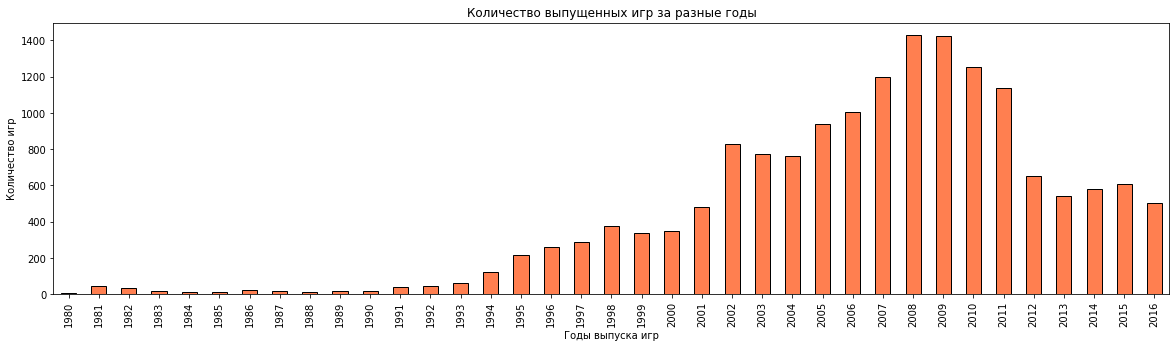

In [18]:
year_of_release_pivot = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot.plot.bar(title='Количество выпущенных игр за разные годы',
                               color='#FF7F50',edgecolor = 'black',  figsize=(20,5), legend=False)
plt.ylabel('Количество игр')
plt.xlabel('Годы выпуска игр')
plt.show()

Больше всего игр было выпущено 2008 и в 2009 гг. 

С 1980 по 1995 годы создание компьютерных игр только зарождалось, в эти годы игр выпускалось очень мало, поэтому данный период времени не важен для анализа данных.

**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами.**

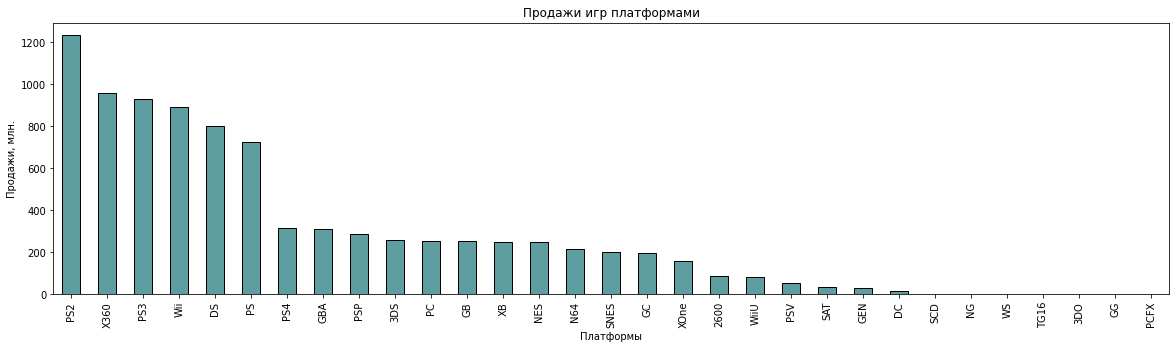

In [19]:
platform_pivot = df.pivot_table(index= ['platform'], values='total_sales', aggfunc='sum')
platform_pivot = platform_pivot.sort_values(by='total_sales', ascending=False)
platform_pivot.plot(kind= 'bar', title='Продажи игр платформами', 
                    edgecolor = 'black',  figsize=(20,5), legend=False,
                    color='#5F9EA0', stacked=True)
plt.ylabel('Продажи, млн.')
plt.xlabel('Платформы')
plt.show()

По графику видно, что у нас есть шесть самых прибыльных платформ: PS2, X360, PS3, Wii, DS, PS.

**Теперь посмотрим распределение продаж игр топ-платформ по годам.**

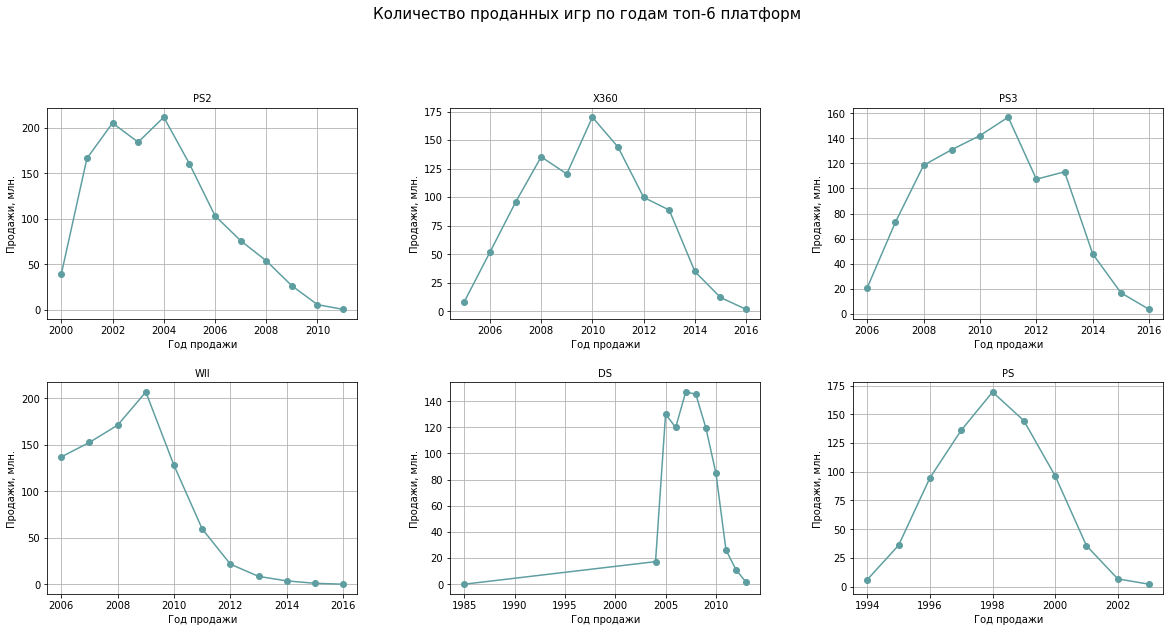

In [20]:
data = 0
df_top = platform_pivot.reset_index()['platform'].head(6)
plt.figure(figsize=[20, 14])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Количество проданных игр по годам топ-6 платформ', fontsize=15)
for name_of_platform in df_top:
    data += 1
    pvt = df.query('platform == @name_of_platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plt.subplot(3, 3, data)
    plt.title(f'{name_of_platform.upper()}', fontsize=10)
    plt.plot(pvt, 'o-', alpha=1, color = '#5F9EA0')
    plt.ylabel('Продажи, млн.')
    plt.xlabel('Год продажи')
    plt.grid(True)
plt.show();

На графиках видно, что у платформ есть определенный срок существования - цикл. Постепенный рост/пик продаж/спад. Визуально кажется, что срок жизни платформы 10 лет, проверим это еще раз.

Однако график платформы WII отличается. в 2009 году резко и существенно сократились продажи. Это логично, так как в 2009 году цена резко упала, так как производители анонсировали скорый выход приемника - WiiU и сокращение продажи и обслуживания WII.

In [21]:
life_p = []
for name_platform in df_top:
    life = df.query('(platform == @name_platform)').pivot_table(index='year_of_release',
                 values='total_sales', aggfunc='sum').count()
    life_p.append(life)
mean_life = int(np.mean(life_p))
print(f' {mean_life} лет')

 11 лет


In [22]:
# код ревьюера

(df[df['platform'].isin(df_top)] # берем данные по топ платформам
 .groupby('platform')['year_of_release'].nunique() # группируем по названию платформы и считаем для каждой из них количество лет
 .mean() # считаем среднее
)

11.166666666666666

Таким образом средний срок жизни платформы - 11 лет.

Нам нужно построить прогноз на 2017 год, следовательно нам нужны данные с 2012 года (примерно середина цикла).

Теперь актуальными данными для дальнейшего исследования будут данные с 2012 года.

In [23]:
df_actual = df.query('year_of_release >= 2012')
df_actual['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

У нас есть 11 платформ для выбора потенциально прибыльных платформ.

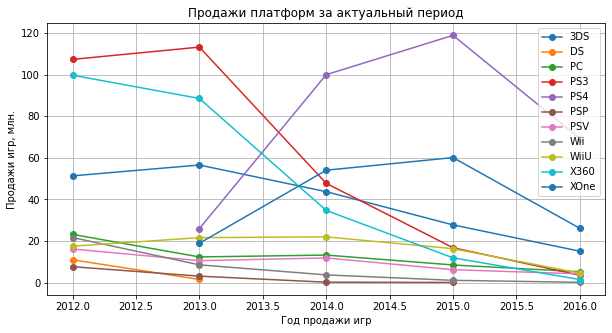

In [24]:
df_actual_pvt = df_actual.pivot_table(index='year_of_release', columns='platform',
                                       values='total_sales', aggfunc='sum')
df_actual_pvt.plot(style='o-', figsize = (10, 5), grid=True, alpha=1,  title='Продажи платформ за актуальный период')
plt.ylabel('Продажи игр, млн.')
plt.xlabel('Год продажи игр')
plt.legend();

И так, потанциально прибыльными платформами будут - PS4 и XOne, так как первые продажи у них были в 2013 году. Не смотря на то, что даже у них в 2016 году продажи пошли на спад (скорее всего это из-за тренда на мобильные игры и определенного упада интереса к компьютерным играм в целом) данные платформы все равно могут принести прибыль. 

По графику видно, что остальные платформы завершают цикл существования, продажи стремятся к нулю, поэтому рассчитывать на их прибыльность в 2017 году не стоит.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

In [25]:
df_actual.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,492.0,0.586951,1.464113,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


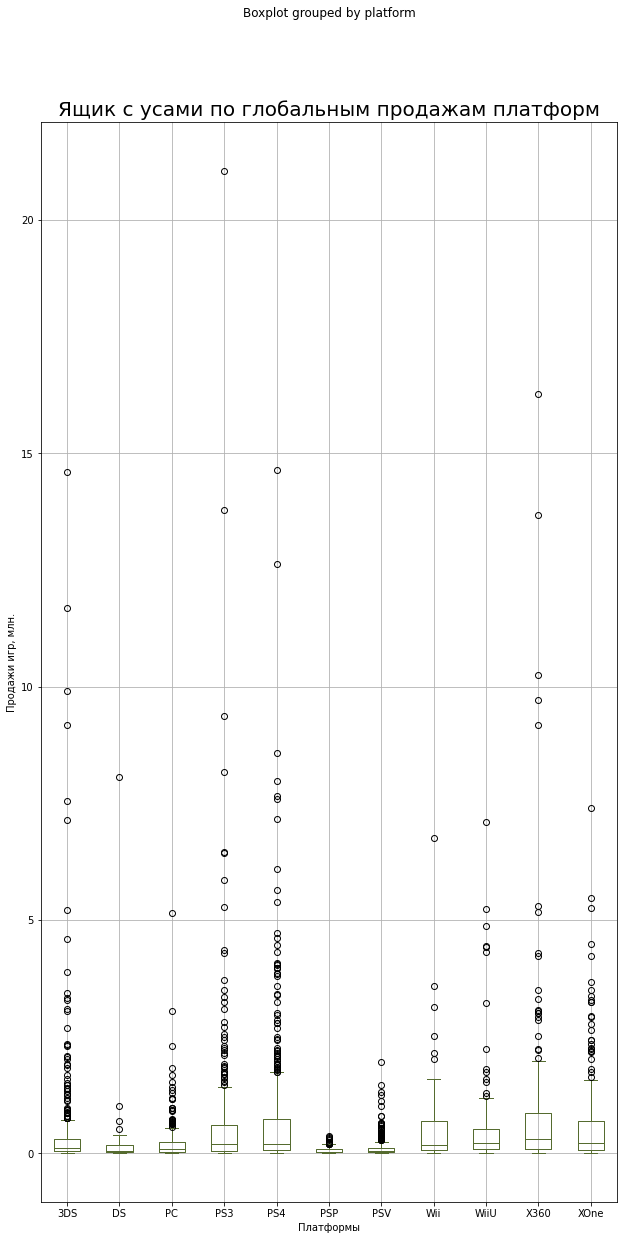

In [26]:
df_actual.boxplot(column='total_sales', by='platform', figsize=(10,20), color = '#556B2F')
plt.title('Ящик с усами по глобальным продажам платформ', fontsize=20)
plt.ylabel('Продажи игр, млн.')
plt.xlabel('Платформы')
plt.show();

Очень много выбросов, ограничим продажи 5 млн.

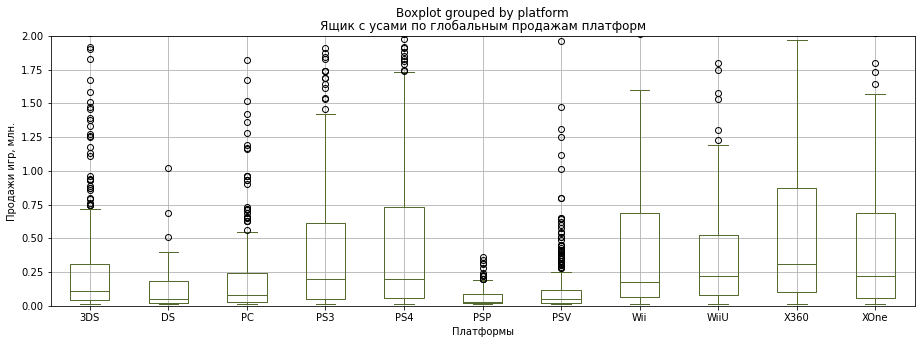

In [27]:
df_actual.boxplot(column='total_sales', by='platform', figsize=(15,5), grid=True, color = '#556B2F')
plt.title('Ящик с усами по глобальным продажам платформ')
plt.ylim(0, 2)
plt.ylabel('Продажи игр, млн.')
plt.xlabel('Платформы')
plt.show();

Выделяются следующие платформы: PS4, X360 и XOne. У них самые длинные границы, а значит больше всех продаж. При этом мало выбросов или их нет вообще (значит продажи стабильные и продаются все игры, а не несколько популярных).

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

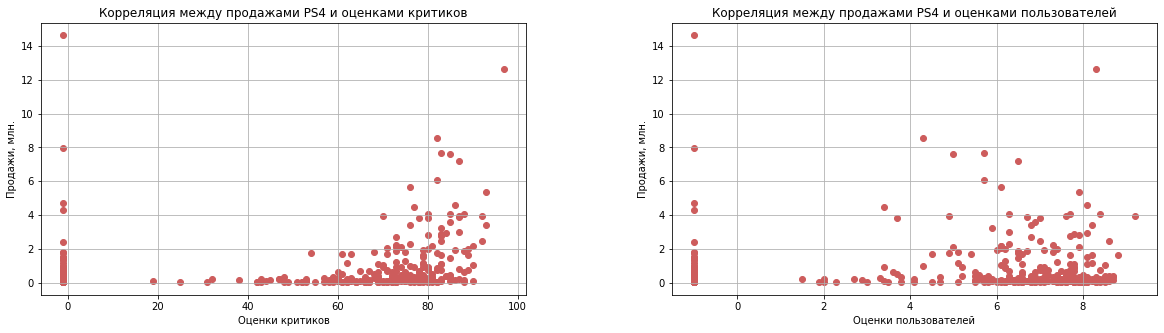

In [28]:
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
plt.scatter(x=df_actual.query('platform == "PS4"')['critic_score'],
            y=df_actual.query('platform == "PS4"')['total_sales'], color = '#CD5C5C')
plt.ylabel('Продажи, млн.')
plt.xlabel('Оценки критиков')
plt.title('Корреляция между продажами PS4 и оценками критиков')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x=df_actual.query('platform == "PS4"')['user_score'],
            y=df_actual.query('platform == "PS4"')['total_sales'], color = '#CD5C5C')
plt.ylabel('Продажи, млн.')
plt.xlabel('Оценки пользователей')
plt.title('Корреляция между продажами PS4 и оценками пользователей')
plt.grid(True);

In [29]:
df_test = df_actual.query('user_score != -1')
df_test_1 = df_actual.query('critic_score != -1')

In [30]:
print('Корреляция между отзывами критиков и продажами:', df_test_1.query('user_score != -1').query('platform == "PS4"')['critic_score'].corr(df_test_1.query('platform == "PS4"')['total_sales']).round(2))
print('Корреляция между отзывами пользователей и продажами:', df_test.query('platform == "PS4"')['user_score'].corr(df_test.query('platform == "PS4"')['total_sales']).round(2))

Корреляция между отзывами критиков и продажами: 0.41
Корреляция между отзывами пользователей и продажами: -0.03


Корреляция между отзывами критиков и продажами платформы PS4 средне положительная, а корреляция между отзывами пользователей и продажами платформы PS4 сильно отрицательная.

Проверим корреляцию в остальных платформах.

In [31]:
df_name = ['3DS', 'DS', 'PC', 'PS3', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

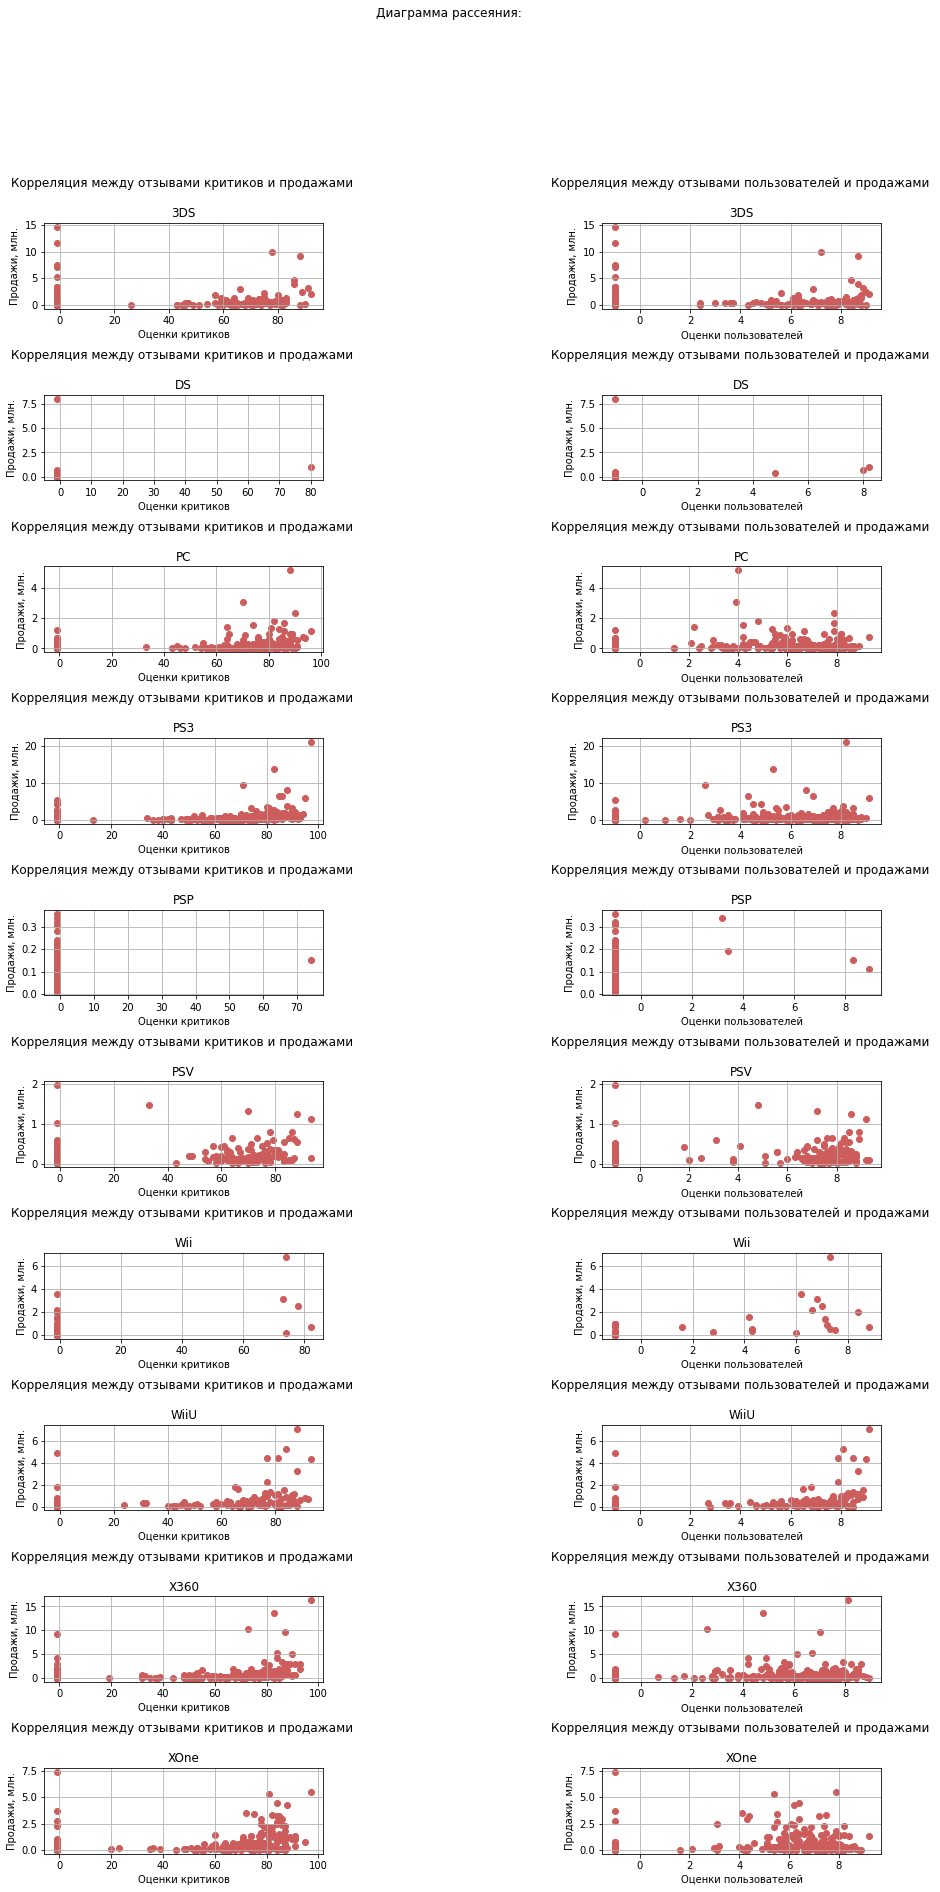

In [32]:
place_df = 0
plt.figure(figsize=[15, 30])
plt.subplots_adjust(wspace=1, hspace=1)
plt.suptitle('Диаграмма рассеяния:')

for name_of_platform in df_name:
    place_df += 1
    plt.subplot(10, 2, place_df)
    plt.scatter(x=df_actual.query('platform == @name_of_platform')['critic_score'],
                y=df_actual.query('platform == @name_of_platform')['total_sales'], color = '#CD5C5C')
    plt.ylabel('Продажи, млн.')
    plt.xlabel('Оценки критиков')
    plt.title(f'Корреляция между отзывами критиков и продажами \n\n{name_of_platform}')
    plt.grid(True)
    
    
    place_df += 1
    plt.subplots_adjust(wspace=1, hspace=1)
    plt.subplot(10, 2, place_df)
    plt.scatter(x=df_actual.query('platform == @name_of_platform')['user_score'],
                y=df_actual.query('platform == @name_of_platform')['total_sales'], color = '#CD5C5C')
    plt.ylabel('Продажи, млн.')
    plt.xlabel('Оценки пользователей')
    plt.title(f'Корреляция между отзывами пользователей и продажами \n\n{name_of_platform}')
    plt.grid(True)
    
#place_df.append(cor)
   

In [33]:
place_df = []
for name_of_platform in df_name:
    cor = df_test.query('platform == @name_of_platform')['user_score'].corr(df_test.query('platform == @name_of_platform')['total_sales']).round(2)
    place_df.append(cor)
    print(name_of_platform, cor);

3DS 0.2
DS 0.88
PC -0.12
PS3 -0.01
PSP -0.8
PSV -0.0
Wii 0.3
WiiU 0.4
X360 0.01
XOne -0.07


У других платформ корреляция между отзывами пользователей и продажами так же слабая, кроме платформы DS (0.88). Это объяснимо. У данной платформы отсутствуют оценки критиков, кроме игры Pokemon Conquest.

In [34]:
print('Корреляция между отзывами критиков и продажами')
place_df = []
for name_of_platform in df_name:
    cor = df_test_1.query('platform == @name_of_platform')['critic_score'].corr(df_test_1.query('platform == @name_of_platform')['total_sales']).round(2)
    place_df.append(cor)
    print(name_of_platform, cor);

Корреляция между отзывами критиков и продажами
3DS 0.32
DS nan
PC 0.24
PS3 0.33
PSP nan
PSV 0.09
Wii -0.42
WiiU 0.35
X360 0.36
XOne 0.42


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Выделяются силой корреляции WII (средняя отрицательная), WiiU, X360, XOne (средняя положительная).

**Посмотрим на общее распределение игр по жанрам.**

Рассмотри медианные значения продаж, они являются наиболее объективным показателем прибыльности, так как менее подвержены влиянию выбросов.

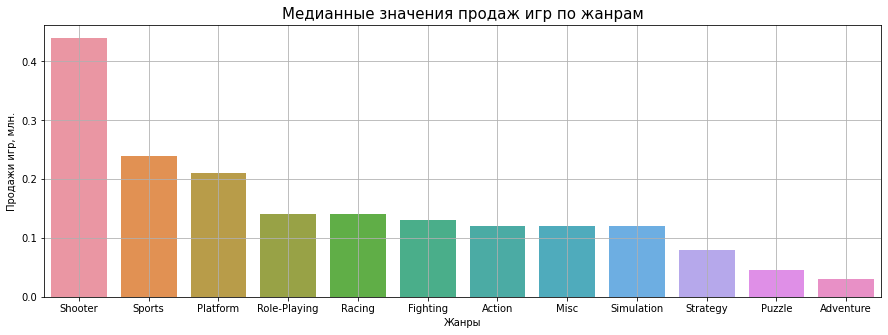

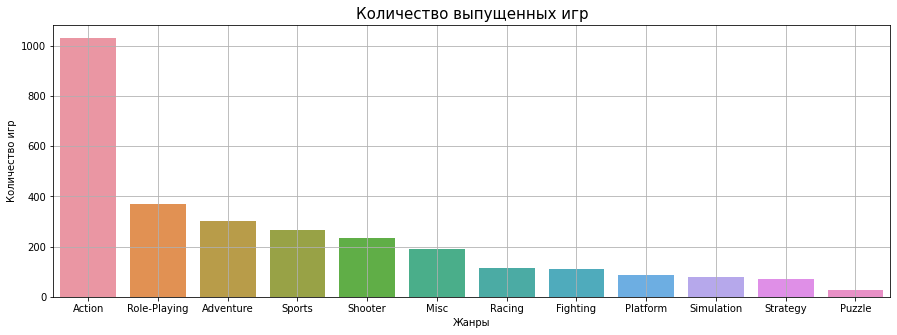

In [35]:

df_2_pvt = df_actual.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales',
                                                                                                 ascending=False).reset_index()

plt.figure(figsize=(15, 5))
plt.title('Медианные значения продаж игр по жанрам', fontsize=15)
sns.barplot(x='genre', y='total_sales', data=df_2_pvt)
plt.ylabel('Продажи игр, млн.')
plt.xlabel('Жанры')
plt.grid(True);
plt.show()


df_22 = df_actual.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name',
                                                                                                 ascending=False).reset_index()
plt.figure(figsize=(15, 5))
g_1 = plt.title('Количество выпущенных игр', fontsize=15)
sns.barplot(x='genre', y='name', data=df_22)
plt.ylabel('Количество игр')
plt.xlabel('Жанры')
plt.grid(True);
plt.show()



Больше всего платформы выпускают игры в жанре Action, при этом самыми продаваемыми играми являются игры жанра Shooter, а Action на 6 месте по продажам.

Игры жанра Adventure продаются хуже всего, хотя занимают третье место по доле выпуска.

**Вывод:**
- средний жизненный цикл платформы - 11 лет;
- PS4 и XOne являются платформами, которые потанциально прибыльные в 2017 году;
- корреляция между отзывами критиков и продажами и корреляция между отзывами пользователей и продажами чаще всего не значительная;
- самым продаваемым жанром является Shooter.

## Портреты пользователей каждого региона

Построим круговые диаграммы по популярности платформ, жанров и рейтингов по каждому региону.

In [36]:
na = df_actual['na_sales'].groupby(by = 
                                   df_actual['platform']).sum().sort_values(ascending=False).head(5)
na_genre = df_actual['na_sales'].groupby(by =
                                         df_actual['genre']).sum().sort_values(ascending=False).head(5)
na_rating = df_actual['na_sales'].groupby(by =
                                         df_actual['rating']).sum().sort_values(ascending=False)

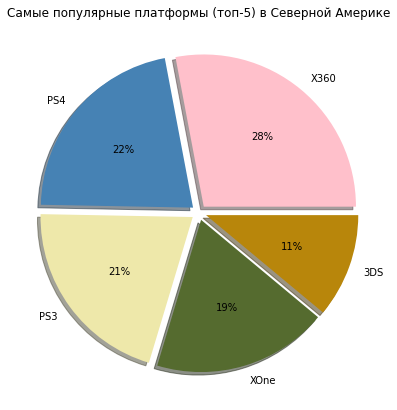

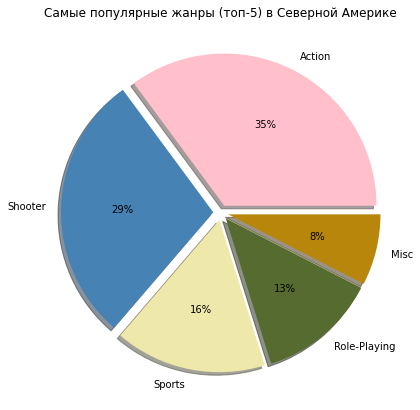

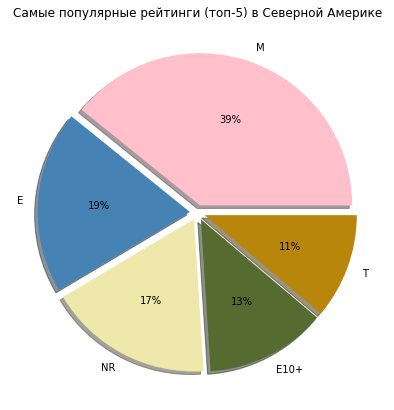

In [37]:
colors = ['pink', 'steelblue', '#EEE8AA', '#556B2F', '#B8860B']
#colors = ['#B0C4DE', '#B0C4DE', '#B0C4DE', '#B0C4DE', '#B0C4DE']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

na.plot.pie(autopct='%1.0f%%', 
            figsize=(7, 7), explode=explode,
            colors = colors, ylabel='', shadow=True) 

plt.title('Самые популярные платформы (топ-5) в Северной Америке')
plt.show()

na_genre.plot.pie(autopct='%1.0f%%', 
            figsize=(7, 7), explode=explode,
                  colors=colors, ylabel='', shadow=True)

plt.title('Самые популярные жанры (топ-5) в Северной Америке')
plt.show();

na_rating.plot.pie(autopct='%1.0f%%', 
            figsize=(7, 7), explode=explode,
                  colors=colors, ylabel='', shadow=True)

plt.title('Самые популярные рейтинги (топ-5) в Северной Америке')
plt.show();

По построенным диаграммам можно сделать следующие выводы по игровому рынку Северной Америке:
   - топ-5 платформ: X360, PS4, PS3, XOne, 3DS;
     - по платформам рынок в основном разделяется между тремя лидерами: X360, PS3 и PS4;
   - топ-5 жанров: Action, Shooter, Sports, Role-Playing, Music
     - Action и Shooter самые популярные жанры;
   - топ-5 рейтингов: M, E, E10+, T;
     - M и Е самые популярные рейтинги. 

In [38]:
eu = df_actual['eu_sales'].groupby(by =
                                   df_actual['platform']).sum().sort_values(ascending=False).head(5)
eu_genre = df_actual['eu_sales'].groupby(by =
                                         df_actual['genre']).sum().sort_values(ascending=False).head(5)
eu_rating = df_actual['eu_sales'].groupby(by =
                                         df_actual['rating']).sum().sort_values(ascending=False)

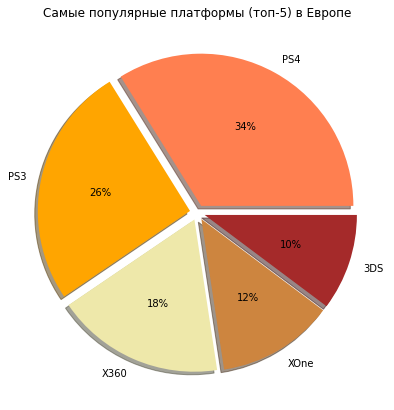

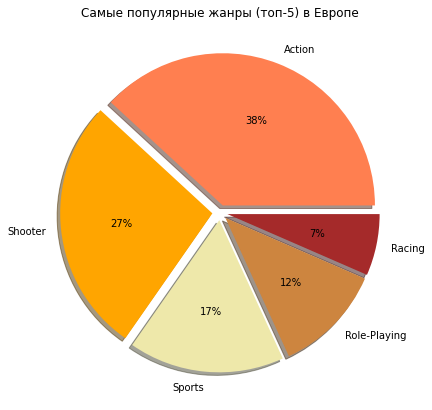

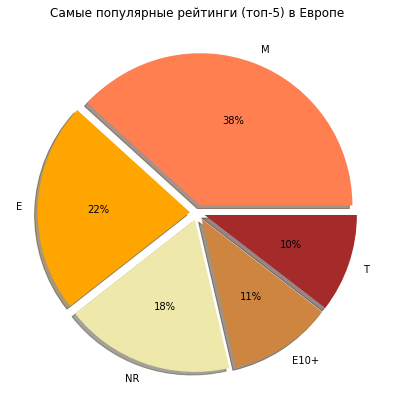

In [39]:
colors = ['coral', 'orange', '#EEE8AA', 'peru', 'brown']
#colors = ['#B0C4DE', '#B0C4DE', '#B0C4DE', '#B0C4DE', '#B0C4DE']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

eu.plot.pie(autopct='%1.0f%%', 
            figsize=(7, 7), explode=explode,
            colors = colors, ylabel='', shadow=True) 
plt.title('Самые популярные платформы (топ-5) в Европе')
plt.show()

eu_genre.plot.pie(autopct='%1.0f%%', 
            figsize=(7, 7), explode=explode,
                  colors=colors, ylabel='', shadow=True)
plt.title('Самые популярные жанры (топ-5) в Европе')
plt.show();

eu_rating.plot.pie(autopct='%1.0f%%', 
            figsize=(7, 7), explode=explode,
                  colors=colors, ylabel='', shadow=True)
plt.title('Самые популярные рейтинги (топ-5) в Европе')
plt.show();

По построенным диаграммам можно сделать следующие выводы по игровому рынку Европы:
- топ-5 платформ: PS4, PS3, X360, XOne, 3DS;
  - по платформам рынок в основном разделяется между тремя лидерами: PS3 и PS4;
- топ-5 жанров: Action, Shooter, Sports, Role-Playing, Racing;
  - Action и Shooter самые популярные жанры;
- топ-5 рейтингов: M, E, E10+, T;
  - M и Е самые популярные рейтинги.

In [44]:
jp = df_actual['jp_sales'].groupby(by =
                                   df_actual['platform']).sum().sort_values(ascending=False).head(5)
jp_genre = df_actual['jp_sales'].groupby(by = 
                                         df_actual['genre']).sum().sort_values(ascending=False).head(5)
jp_rating = df_actual['jp_sales'].groupby(by =
                                         df_actual['rating']).sum().sort_values(ascending=False)
jp

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

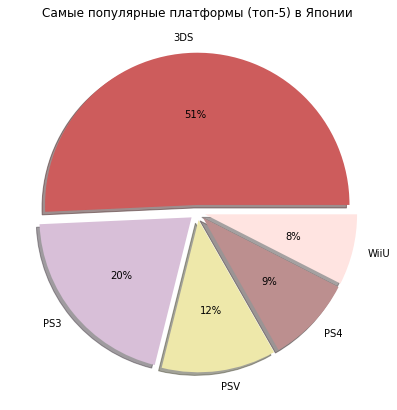

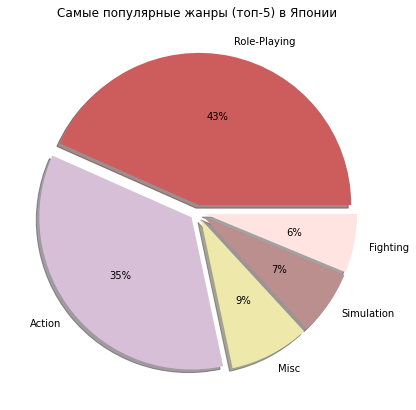

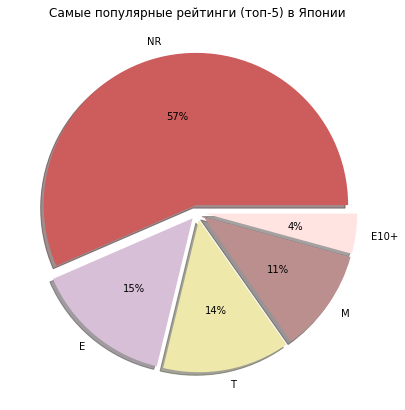

In [41]:
colors = ['#CD5C5C', '#D8BFD8', '#EEE8AA', '#BC8F8F', '#FFE4E1']
#colors = ['#B0C4DE', '#B0C4DE', '#B0C4DE', '#B0C4DE', '#B0C4DE']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

jp.plot.pie(autopct='%1.0f%%', figsize=(7, 7), explode=explode, colors = colors, ylabel='', shadow=True)
plt.title('Самые популярные платформы (топ-5) в Японии')
plt.show();


jp_genre.plot.pie(autopct='%1.0f%%', figsize=(7, 7), explode=explode, colors = colors, ylabel='', shadow=True)
plt.title('Самые популярные жанры (топ-5) в Японии')
plt.show();

jp_rating.plot.pie(autopct='%1.0f%%', figsize=(7, 7), explode=explode, colors=colors, ylabel='', shadow=True)
plt.title('Самые популярные рейтинги (топ-5) в Японии')
plt.show();

По построенным диаграммам можно сделать следующие выводы по игровому рынку Японии:
- топ-5 платформ: 3DS, PS3, PSV, PS4, WiiU;
  - половна рынка пренадлежит платформе 3DS (ее производит Япония);
- топ-5 жанров: Role-Playing, Action, Misc, Simulation, Fighting;
  - на первое место выходит жанр Role-Playing. При этом популярного в Северной Америке и Европе жанра Shooter в японском топе нет вообще;
- топ-5 рейтингов: у 57% игр нет рейтинга, а остальные 43% разделяют рейтинги M, E, E10+, T. У большинства игр нет рейтинга, потому что в Японии есть своя ассоциация, которая присваивает рейтинги (CERO).

## Проверка гипотез

### Xbox One & PC

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем двустороннюю гипотезу:
- H0: cредние пользовательские рейтинги платформ Xbox One и PC равны
- H1: средние пользовательские рейтинги платформ Xbox One и PC не равны

Проведем T-тест с двумя выборками.
Уровень значимость будет равен 0,05.

In [42]:
df_test = df_actual.query('user_score != -1')

res = st.ttest_ind(df_test.query('platform == "XOne"')['user_score'],
                            df_test.query('platform == "PC"')['user_score'], equal_var=False)

alpha = 0.05
print('Значение p-value: ', res.pvalue)

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Значение p-value:  0.5489537965134912
Не отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу в пользу альтернативы, поэтому можем предположить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Action & Sports

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Сформулируем двустороннюю гипотезу:
- H0: cредние пользовательские рейтинги жанров Action и Sports равны
- H1: cредние пользовательские рейтинги жанров Action и Sports не равны

Проведем T-тест с двумя выборками.
Уровень значимость будет равен 0,05.

In [43]:
df_test = df_actual.query('user_score != -1')

res = st.ttest_ind(df_test.query('genre== "Action"')['user_score'],
                            df_test.query('genre == "Sports"')['user_score'], equal_var=False)

alpha = 0.05
print('Значение p-value: ', res.pvalue)

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Значение p-value:  5.989458066467418e-20
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативы, поэтому можем предположить, что средние пользовательские рейтинги жанров Action и Sports действитльно разные.

Для проверки гипотез нулевые и альтернативные гипотезы были сформулированы через "равно, не равно", так как являются двусторонними.

Также был использован критерий Стьюдента (t-тест), так как он позволяет сравнивать средние значения двух выборок и на основе результатов теста.

## Вывод

**В ходе исследования была проделана следующая работа:**
1. **Мы сделали предобработку данных для очистки датафрейма;**
2. **Выполнили исследовательский анализ данных, в ходе которого выяснили следующее:**
   - компьютерные игры были очень популярны в 2008 и 2009 гг., потом продажи постепенно падают;
   - самыми прибыльными платформами являются: PS2, X360, PS3, Wii, DS, PS;
   - средний цикл жизни платформы - 11 лет;
   - PS4 и XOne потенциально могу принести прибыль в 2017 году;
   - корреляция между отзывами пользователей и продажами и корреляция между отзывами критиков и продажами слабая;
   - Action самый популярный жанр как у производителей, но уступает жанру Shooter в популярности у покупателей.
3. **Составили портреты пользователей трех регионов (Северная Америка, Европа, Япония)**
   - В Северной Америке популярны платформы X360, PS4, PS3, XOne, 3DS. Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Music, а самые популярные рейтинги М и Е;
   - В Европе топ-5 платформ PS4, PS3, X360, XOne, 3DS (те же самые, что и в Северной Америке). Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Racing. Популярные рейтинги;
   - Японский рынок очень отличается от других. Тут самые популярные платформы: 3DS, PS3, PSV, PS4, WiiU (половина рынка принадлежит платформе 3DS). Топ-5 жанров: Role-Playing, Action, Misc, Simulation, Fighting. На этом рынке больше, чем у половины рынка нет рейтинга, так как в Японии есть своя ассоциация, которая присваивает рейтинги (CERO) самостоятельно.
4. **Проверили две гипотезы и сделали следующие выводы:**
   - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - средние пользовательские рейтинги жанров Action и Sports действительно разные.

**Проанализировав данные можно сказать, что:**

Пик популярности компьютерных игр закончился в 2009 году, к 2017 году **потенциально прибыльных платформ осталось всего две - PS4 и XOne.**

Для получения прибыли в 2017 году платформам стоит продолжать ориентироваться на рынок Северной Америки и Европы, так как они приносят основную прибыль (рынок Японии уникальный, имеет собственную ассоциацию рейтингов и отдает предпочтения платформе, которую производит сама). В производстве стоит сделать упор на жанр Shooter, так как он самый популярный у пользователей.